In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
# from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [3]:
df = pd.read_csv('df_train.csv')
df

X = df.drop(columns=["Loan Status"])
y = df["Loan Status"]

X = pd.get_dummies(X)
X




,Current Loan Amount,Credit Scores,Years in current job,Annual Income,Monthly Debt,Annual Debt,Debt to Income Ratio,Years of Credit History,Number of Open Accounts,Number of Credit Problems,...,Purpose_vacation,Purpose_wedding,Debt to Income Ratio G/B_Bad DTI,Debt to Income Ratio G/B_Excellent DTI,Debt to Income Ratio G/B_Good DTI,Debt to Income Ratio G/B_Very Bad DTI,Utilization Rate Good/Bad_Bad UR,Utilization Rate Good/Bad_Excellent UR,Utilization Rate Good/Bad_Good UR,Utilization Rate Good/Bad_Very Bad UR
0,491,715,1,72254,19.67,236.04,0.173108,27.4,3,0,...,0,0,0,0,0,1,0,1,0,0
1,701,718,1,19040,196.74,2360.88,0.120000,11.6,4,0,...,0,0,0,0,1,0,0,0,0,1
2,885,731,3,11801,164.23,1970.76,0.170000,14.4,4,0,...,0,0,0,0,1,0,1,0,0,0
3,975,713,6,24378,692.73,8312.76,0.340000,7.1,10,0,...,0,0,0,0,0,1,1,0,0,0
4,975,694,10,59599,1157.22,13886.64,0.230000,27.2,12,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53266,35868,662,1,111191,2081.12,24973.44,0.220000,17.5,16,0,...,0,0,1,0,0,0,0,0,0,1
53267,35872,744,2,112739,807.96,9695.52,0.090000,21.2,10,0,...,0,0,0,1,0,0,1,0,0,0
53268,35872,716,3,84042,2353.17,28238.04,0.340000,28.5,15,0,...,0,0,0,0,0,1,1,0,0,0
53269,35872,713,10,117864,2327.80,27933.60,0.240000,17.3,17,0,...,0,0,1,0,0,0,1,0,0,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.72743655203484


In [6]:
feature_importances = clf.feature_importances_

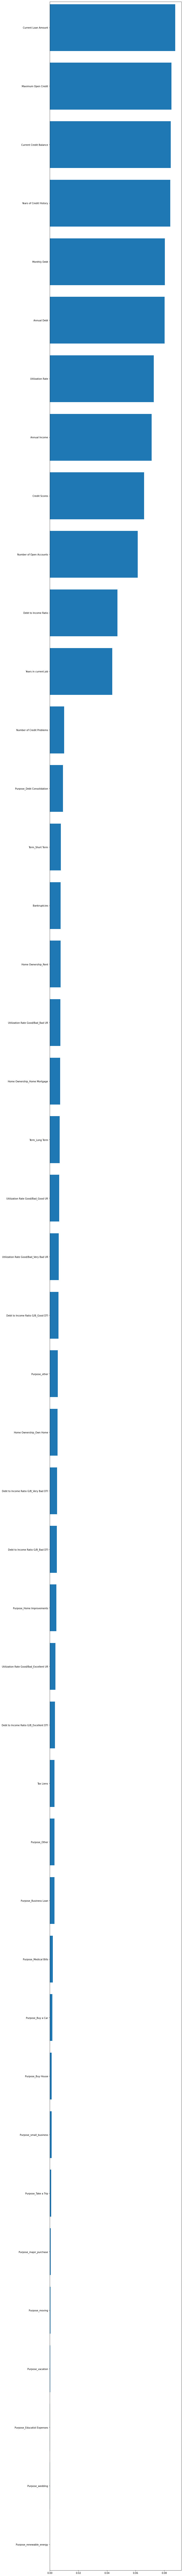

In [7]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [9]:
pickle.dump(clf,open("model.save","wb"))